In [1]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from mc_lib.rndm import RndmWrapper


In [2]:
def read_conformation(fname):
    struct_conf = []
    
    f = open(fname, 'r')
    f.readline()
    for line in f:
        line_ar = line.split()
        
        struct_conf += [[int(line_ar[0]), int(line_ar[1])]]
        
    return struct_conf

In [3]:
file_name = 'Conformations\\struct_conf_0.dat'

In [4]:
struct_1 = read_conformation(file_name)

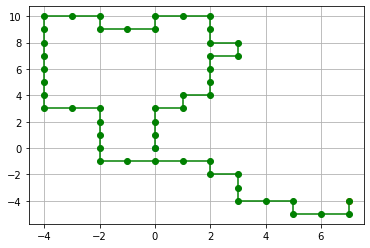

In [5]:
def draw_conformation(struct):
    struct = np.array(struct)
    plt.plot(struct[:, 0], struct[:, 1], '-go')
    plt.scatter(struct[0, 0], struct[0, 1])
    plt.scatter(struct[-1, 0], struct[-1, 1])
    plt.grid(True)
draw_conformation(struct_1)

In [6]:
spins = np.zeros((len(struct_1)), dtype = int)

In [7]:
def tabulate_neighbors(struct):
    neighb = np.zeros((len(struct), 5), dtype=int)
    for site in range(len(struct)):
        coordinate = struct[site]
        c1 = [coordinate[0] + 1, coordinate[1]]
        c2 = [coordinate[0] - 1, coordinate[1]]
        c3 = [coordinate[0], coordinate[1] + 1]
        c4 = [coordinate[0], coordinate[1] - 1]
        C_arr = [c1, c2, c3, c4]
        for coord in C_arr:
            try:
                site1 = struct.index(coord)
                neighb[site, 0] += 1
                neighb[site, neighb[site, 0]] = site1
            except:
                continue
    return neighb

In [8]:
tabulate_neighbors(struct_1)

array([[ 2,  1, 37,  0,  0],
       [ 2,  2,  0,  0,  0],
       [ 2,  3,  1,  0,  0],
       [ 2,  4,  2,  0,  0],
       [ 2,  3,  5,  0,  0],
       [ 2,  6,  4,  0,  0],
       [ 2,  5,  7,  0,  0],
       [ 2,  8,  6,  0,  0],
       [ 2,  9,  7,  0,  0],
       [ 3, 10, 12,  8,  0],
       [ 2,  9, 11,  0,  0],
       [ 2, 12, 10,  0,  0],
       [ 3, 11, 13,  9,  0],
       [ 2, 14, 12,  0,  0],
       [ 2, 15, 13,  0,  0],
       [ 2, 14, 16,  0,  0],
       [ 2, 15, 17,  0,  0],
       [ 2, 18, 16,  0,  0],
       [ 2, 17, 19,  0,  0],
       [ 2, 18, 20,  0,  0],
       [ 2, 21, 19,  0,  0],
       [ 2, 20, 22,  0,  0],
       [ 2, 21, 23,  0,  0],
       [ 2, 22, 24,  0,  0],
       [ 2, 23, 25,  0,  0],
       [ 2, 24, 26,  0,  0],
       [ 2, 25, 27,  0,  0],
       [ 2, 26, 28,  0,  0],
       [ 2, 27, 29,  0,  0],
       [ 2, 30, 28,  0,  0],
       [ 2, 31, 29,  0,  0],
       [ 2, 30, 32,  0,  0],
       [ 2, 31, 33,  0,  0],
       [ 2, 32, 34,  0,  0],
       [ 2, 33

In [9]:
import cy_ising

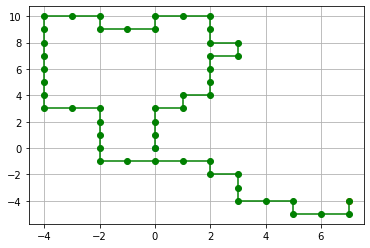

In [10]:
file_name = 'Conformations\\struct_conf_0.dat'
struct_1 = read_conformation(file_name)
draw_conformation(struct_1)

In [11]:
neighbors = tabulate_neighbors(struct_1)
L = len(struct_1)
beta = 1
cy_ising.simulate(L = L, neighbors = neighbors, beta=beta, num_sweeps=100000)

[[ 2  1 37  0  0]
 [ 2  2  0  0  0]
 [ 2  3  1  0  0]
 [ 2  4  2  0  0]
 [ 2  3  5  0  0]
 [ 2  6  4  0  0]
 [ 2  5  7  0  0]
 [ 2  8  6  0  0]
 [ 2  9  7  0  0]
 [ 3 10 12  8  0]
 [ 2  9 11  0  0]
 [ 2 12 10  0  0]
 [ 3 11 13  9  0]
 [ 2 14 12  0  0]
 [ 2 15 13  0  0]
 [ 2 14 16  0  0]
 [ 2 15 17  0  0]
 [ 2 18 16  0  0]
 [ 2 17 19  0  0]
 [ 2 18 20  0  0]
 [ 2 21 19  0  0]
 [ 2 20 22  0  0]
 [ 2 21 23  0  0]
 [ 2 22 24  0  0]
 [ 2 23 25  0  0]
 [ 2 24 26  0  0]
 [ 2 25 27  0  0]
 [ 2 26 28  0  0]
 [ 2 27 29  0  0]
 [ 2 30 28  0  0]
 [ 2 31 29  0  0]
 [ 2 30 32  0  0]
 [ 2 31 33  0  0]
 [ 2 32 34  0  0]
 [ 2 33 35  0  0]
 [ 2 36 34  0  0]
 [ 2 37 35  0  0]
 [ 3 38 36  0  0]
 [ 2 39 37  0  0]
 [ 2 38 40  0  0]
 [ 2 41 39  0  0]
 [ 2 40 42  0  0]
 [ 2 41 43  0  0]
 [ 2 44 42  0  0]
 [ 2 45 43  0  0]
 [ 2 44 46  0  0]
 [ 2 47 45  0  0]
 [ 2 48 46  0  0]
 [ 2 47 49  0  0]
 [ 1 48  0  0  0]]
beta =  1.0   T =  1.0
initial config:  [ 1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1  

RuntimeError: did not converge

In [12]:
neighbors = tabulate_neighbors(struct_1)
L = len(struct_1)
beta = 0.0001
cy_ising.simulate(L = L, neighbors = neighbors, beta=beta, num_sweeps=100000)

[[ 2  1 37  0  0]
 [ 2  2  0  0  0]
 [ 2  3  1  0  0]
 [ 2  4  2  0  0]
 [ 2  3  5  0  0]
 [ 2  6  4  0  0]
 [ 2  5  7  0  0]
 [ 2  8  6  0  0]
 [ 2  9  7  0  0]
 [ 3 10 12  8  0]
 [ 2  9 11  0  0]
 [ 2 12 10  0  0]
 [ 3 11 13  9  0]
 [ 2 14 12  0  0]
 [ 2 15 13  0  0]
 [ 2 14 16  0  0]
 [ 2 15 17  0  0]
 [ 2 18 16  0  0]
 [ 2 17 19  0  0]
 [ 2 18 20  0  0]
 [ 2 21 19  0  0]
 [ 2 20 22  0  0]
 [ 2 21 23  0  0]
 [ 2 22 24  0  0]
 [ 2 23 25  0  0]
 [ 2 24 26  0  0]
 [ 2 25 27  0  0]
 [ 2 26 28  0  0]
 [ 2 27 29  0  0]
 [ 2 30 28  0  0]
 [ 2 31 29  0  0]
 [ 2 30 32  0  0]
 [ 2 31 33  0  0]
 [ 2 32 34  0  0]
 [ 2 33 35  0  0]
 [ 2 36 34  0  0]
 [ 2 37 35  0  0]
 [ 3 38 36  0  0]
 [ 2 39 37  0  0]
 [ 2 38 40  0  0]
 [ 2 41 39  0  0]
 [ 2 40 42  0  0]
 [ 2 41 43  0  0]
 [ 2 44 42  0  0]
 [ 2 45 43  0  0]
 [ 2 44 46  0  0]
 [ 2 47 45  0  0]
 [ 2 48 46  0  0]
 [ 2 47 49  0  0]
 [ 1 48  0  0  0]]
beta =  0.0001   T =  10000.0
initial config:  [ 1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 

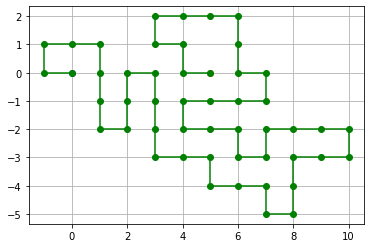

In [13]:
file_name = 'Conformations\\struct_conf_1.dat'
struct_2 = read_conformation(file_name)
draw_conformation(struct_2)

In [14]:
neighbors = tabulate_neighbors(struct_2)
L = len(struct_2)
beta = 1
cy_ising.simulate(L = L, neighbors = neighbors, beta=beta, num_sweeps=100000)

[[ 3  5  1  3  0]
 [ 2  0  2  0  0]
 [ 2  3  1  0  0]
 [ 3  4  2  0  0]
 [ 2  3  5  0  0]
 [ 4 10  0  4  6]
 [ 3  9  5  7  0]
 [ 2  8  6  0  0]
 [ 3 13  7  9  0]
 [ 4 12  6 10  8]
 [ 3 11  5  9  0]
 [ 4 48 10 46 12]
 [ 4 35  9 11 13]
 [ 4 34  8 12 14]
 [ 2 15 13  0  0]
 [ 3 16 14 34  0]
 [ 4 31 15 33 17]
 [ 2 18 16  0  0]
 [ 3 19 17 31  0]
 [ 4 22 18 30 20]
 [ 2 21 19  0  0]
 [ 2 20 22  0  0]
 [ 3 19 23 21  0]
 [ 4 24 30 28 22]
 [ 3 25 23 27  0]
 [ 2 24 26  0  0]
 [ 2 27 25  0  0]
 [ 3 26 28 24  0]
 [ 3 27 29 23  0]
 [ 4 28 32 38 30]
 [ 4 23 31 29 19]
 [ 4 30 16 32 18]
 [ 4 29 33 37 31]
 [ 4 32 34 36 16]
 [ 4 33 13 35 15]
 [ 4 36 12 48 34]
 [ 4 37 35 49 33]
 [ 4 38 36 40 32]
 [ 3 37 39 29  0]
 [ 2 40 38  0  0]
 [ 4 39 49 41 37]
 [ 2 42 40  0  0]
 [ 2 43 41  0  0]
 [ 2 42 44  0  0]
 [ 3 43 45 47  0]
 [ 2 44 46  0  0]
 [ 3 47 45 11  0]
 [ 3 46 44 48  0]
 [ 4 49 11 47 35]
 [ 3 40 48 36  0]]
beta =  1.0   T =  1.0
initial config:  [ 1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1  

RuntimeError: did not converge

In [15]:
neighbors = tabulate_neighbors(struct_2)
L = len(struct_2)
beta = 0.0001
cy_ising.simulate(L = L, neighbors = neighbors, beta=beta, num_sweeps=100000)

[[ 3  5  1  3  0]
 [ 2  0  2  0  0]
 [ 2  3  1  0  0]
 [ 3  4  2  0  0]
 [ 2  3  5  0  0]
 [ 4 10  0  4  6]
 [ 3  9  5  7  0]
 [ 2  8  6  0  0]
 [ 3 13  7  9  0]
 [ 4 12  6 10  8]
 [ 3 11  5  9  0]
 [ 4 48 10 46 12]
 [ 4 35  9 11 13]
 [ 4 34  8 12 14]
 [ 2 15 13  0  0]
 [ 3 16 14 34  0]
 [ 4 31 15 33 17]
 [ 2 18 16  0  0]
 [ 3 19 17 31  0]
 [ 4 22 18 30 20]
 [ 2 21 19  0  0]
 [ 2 20 22  0  0]
 [ 3 19 23 21  0]
 [ 4 24 30 28 22]
 [ 3 25 23 27  0]
 [ 2 24 26  0  0]
 [ 2 27 25  0  0]
 [ 3 26 28 24  0]
 [ 3 27 29 23  0]
 [ 4 28 32 38 30]
 [ 4 23 31 29 19]
 [ 4 30 16 32 18]
 [ 4 29 33 37 31]
 [ 4 32 34 36 16]
 [ 4 33 13 35 15]
 [ 4 36 12 48 34]
 [ 4 37 35 49 33]
 [ 4 38 36 40 32]
 [ 3 37 39 29  0]
 [ 2 40 38  0  0]
 [ 4 39 49 41 37]
 [ 2 42 40  0  0]
 [ 2 43 41  0  0]
 [ 2 42 44  0  0]
 [ 3 43 45 47  0]
 [ 2 44 46  0  0]
 [ 3 47 45 11  0]
 [ 3 46 44 48  0]
 [ 4 49 11 47 35]
 [ 3 40 48 36  0]]
beta =  0.0001   T =  10000.0
initial config:  [ 1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 